# Machine Learning Linear Regression Model 1 
> ## Maternal Mortality Analysis without Race
***

### Importing Dependencies

In [1]:
# Importing dependencies:
import numpy as np
import pandas as pd

### Read the CSV and Perform Basic Data Cleaning

In [2]:
# Reading the csv file into a pandas DataFrame
mmr_without_race = pd.read_csv('../Resources/non_race_data.csv')
mmr_without_race

,year,state,id,state_code,latitude,longitude,deaths,births,maternal_mortality_ratio,population,...,prem_death_val,smoking_val,uninsured_val,all_determs_val,all_outcomes_val,chlamydia_val,prem_death_ri_val,teen_birth_val,primary_care_val,low_birthweight_val
0,2015,Alabama,US.AL,AL,32.318231,-86.902298,12.0,59657.0,20.11,2505795.0,...,10095.0,21.1,12.9,-0.371,-0.325,611.0,1.2,34.3,103.5,10.0
1,2016,Alabama,US.AL,AL,32.318231,-86.902298,35.0,59151.0,59.17,2507714.0,...,10097.0,21.4,11.1,-0.427,-0.366,600.2,1.1,32.0,116.4,10.1
2,2017,Alabama,US.AL,AL,32.318231,-86.902298,41.0,58941.0,69.56,2514911.0,...,10321.0,21.5,9.6,-0.427,-0.335,543.6,1.2,30.1,119.3,10.4
3,2018,Alabama,US.AL,AL,32.318231,-86.902298,31.0,57761.0,53.67,2523756.0,...,10720.0,20.9,9.3,-0.483,-0.356,553.6,1.1,28.4,122.8,10.3
4,2019,Alabama,US.AL,AL,32.318231,-86.902298,35.0,58615.0,59.71,2533668.0,...,10435.0,19.2,9.7,-0.437,-0.383,614.1,1.2,27.0,122.8,10.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,2014,Wisconsin,US.WI,WI,43.784440,-88.787868,16.0,67161.0,23.82,2898057.0,...,6207.0,18.7,9.0,0.165,0.067,415.4,2.0,21.9,125.0,7.1
304,2015,Wisconsin,US.WI,WI,43.784440,-88.787868,11.0,67041.0,16.41,2903737.0,...,6365.0,17.4,8.2,0.146,0.046,411.6,1.9,19.6,125.3,7.0
305,2016,Wisconsin,US.WI,WI,43.784440,-88.787868,15.0,66615.0,22.52,2905282.0,...,6324.0,17.3,6.5,0.114,0.106,403.2,1.9,18.0,140.3,7.3
306,2017,Wisconsin,US.WI,WI,43.784440,-88.787868,12.0,64975.0,18.47,2912745.0,...,6437.0,17.1,5.5,0.201,0.072,423.5,1.9,16.2,145.2,7.3


In [3]:
# Checking dataframe rows
mmr_without_race.count()

year                        308
state                       308
id                          308
state_code                  308
latitude                    308
longitude                   308
deaths                      308
births                      308
maternal_mortality_ratio    308
population                  308
employer                    308
non_group                   308
medicaid                    308
medicare                    308
military                    308
uninsured                   308
air_pollution_val           308
cancer_death_val            308
cardio_death_val            308
child_pov_val               308
choles_check_val            308
dent_vis_val                308
dentists_val                308
diabetes_val                308
drug_deaths_val             308
health_stat_fem_val         308
immun_child_val             308
income_ineq_val             308
infant_mort_val             308
infect_dis_val              308
obesity_val                 308
phys_ina

In [4]:
# Checking data types and columns
mmr_without_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      308 non-null    int64  
 1   state                     308 non-null    object 
 2   id                        308 non-null    object 
 3   state_code                308 non-null    object 
 4   latitude                  308 non-null    float64
 5   longitude                 308 non-null    float64
 6   deaths                    308 non-null    float64
 7   births                    308 non-null    float64
 8   maternal_mortality_ratio  308 non-null    float64
 9   population                308 non-null    float64
 10  employer                  308 non-null    float64
 11  non_group                 308 non-null    float64
 12  medicaid                  308 non-null    float64
 13  medicare                  308 non-null    float64
 14  military  

In [5]:
mmr_without_race.columns

Index(['year', 'state', 'id', 'state_code', 'latitude', 'longitude', 'deaths',
       'births', 'maternal_mortality_ratio', 'population', 'employer',
       'non_group', 'medicaid', 'medicare', 'military', 'uninsured',
       'air_pollution_val', 'cancer_death_val', 'cardio_death_val',
       'child_pov_val', 'choles_check_val', 'dent_vis_val', 'dentists_val',
       'diabetes_val', 'drug_deaths_val', 'health_stat_fem_val',
       'immun_child_val', 'income_ineq_val', 'infant_mort_val',
       'infect_dis_val', 'obesity_val', 'phys_inac_val', 'prem_death_val',
       'smoking_val', 'uninsured_val', 'all_determs_val', 'all_outcomes_val',
       'chlamydia_val', 'prem_death_ri_val', 'teen_birth_val',
       'primary_care_val', 'low_birthweight_val'],
      dtype='object')

### Selected Features for the model

In [6]:
# Selecting the features from the dataframe that will be the X values
selected_features = mmr_without_race[['deaths',
       'births', 'maternal_mortality_ratio', 'population', 'employer',
       'non_group', 'medicaid', 'medicare', 'military', 'uninsured',
       'air_pollution_val', 'cancer_death_val', 'cardio_death_val',
       'child_pov_val', 'choles_check_val', 'dent_vis_val', 'dentists_val',
       'diabetes_val', 'drug_deaths_val', 'health_stat_fem_val',
       'immun_child_val', 'income_ineq_val', 'infant_mort_val',
       'infect_dis_val', 'obesity_val', 'phys_inac_val', 'prem_death_val',
       'smoking_val', 'uninsured_val', 'all_determs_val', 'all_outcomes_val',
       'chlamydia_val', 'prem_death_ri_val', 'teen_birth_val',
       'primary_care_val', 'low_birthweight_val']]
selected_features.head()

,deaths,births,maternal_mortality_ratio,population,employer,non_group,medicaid,medicare,military,uninsured,...,prem_death_val,smoking_val,uninsured_val,all_determs_val,all_outcomes_val,chlamydia_val,prem_death_ri_val,teen_birth_val,primary_care_val,low_birthweight_val
0,12.0,59657.0,20.11,2505795.0,57.4,8.9,13.6,4.0,2.2,13.9,...,10095.0,21.1,12.9,-0.371,-0.325,611.0,1.2,34.3,103.5,10.0
1,35.0,59151.0,59.17,2507714.0,58.7,9.1,13.8,3.8,1.9,12.7,...,10097.0,21.4,11.1,-0.427,-0.366,600.2,1.1,32.0,116.4,10.1
2,41.0,58941.0,69.56,2514911.0,58.0,8.6,13.6,4.2,2.3,13.3,...,10321.0,21.5,9.6,-0.427,-0.335,543.6,1.2,30.1,119.3,10.4
3,31.0,57761.0,53.67,2523756.0,58.8,7.5,13.7,3.6,2.5,13.9,...,10720.0,20.9,9.3,-0.483,-0.356,553.6,1.1,28.4,122.8,10.3
4,35.0,58615.0,59.71,2533668.0,58.8,7.8,13.9,3.8,2.4,13.3,...,10435.0,19.2,9.7,-0.437,-0.383,614.1,1.2,27.0,122.8,10.3


### Ploting Data for Visualization using Seaborn Heatmap
***

Correlation Matrix is also called square format formed by performing the `corr()` function on the dataset, and this matrix is plotted on the heatmap

In [7]:
# Printing the correlation matrix with `corr`
selected_features.corr()

,deaths,births,maternal_mortality_ratio,population,employer,non_group,medicaid,medicare,military,uninsured,...,prem_death_val,smoking_val,uninsured_val,all_determs_val,all_outcomes_val,chlamydia_val,prem_death_ri_val,teen_birth_val,primary_care_val,low_birthweight_val
deaths,1.000000,0.821868,0.235069,0.789032,-0.268798,0.042867,-0.081354,-0.238558,-0.102549,0.322587,...,-0.175551,-0.247768,0.395845,-0.085967,0.086018,0.114382,-0.237738,0.048008,-0.050138,0.011313
births,0.821868,1.000000,-0.229183,0.987923,-0.227187,0.094957,0.015316,-0.401775,-0.165440,0.224364,...,-0.369198,-0.400382,0.311630,0.126885,0.256755,-0.008703,-0.067050,-0.025878,0.026635,-0.210687
maternal_mortality_ratio,0.235069,-0.229183,1.000000,-0.249864,-0.262488,-0.048984,0.028156,0.434098,0.061844,0.157246,...,0.498445,0.329596,0.122712,-0.496458,-0.488129,0.359987,-0.396286,0.157247,-0.175889,0.472751
population,0.789032,0.987923,-0.249864,1.000000,-0.208207,0.132825,0.069372,-0.400145,-0.191658,0.159225,...,-0.390039,-0.417872,0.241285,0.159525,0.257701,0.001806,-0.070141,-0.105223,0.094877,-0.211416
employer,-0.268798,-0.227187,-0.262488,-0.208207,1.000000,-0.084822,-0.131332,-0.408418,-0.287645,-0.628036,...,-0.518399,-0.292632,-0.622332,0.627947,0.513107,-0.445105,0.474462,-0.591573,0.515622,-0.411161
non_group,0.042867,0.094957,-0.048984,0.132825,-0.084822,1.000000,-0.024795,-0.078933,0.198937,-0.223255,...,-0.227284,-0.351730,-0.153542,0.144042,0.132474,-0.002229,-0.047133,-0.403596,0.013671,-0.212408
medicaid,-0.081354,0.015316,0.028156,0.069372,-0.131332,-0.024795,1.000000,0.080199,-0.416706,-0.603635,...,0.041218,0.014845,-0.533526,0.007717,-0.156394,0.264816,0.019945,-0.312497,0.445830,0.021510
medicare,-0.238558,-0.401775,0.434098,-0.400145,-0.408418,-0.078933,0.080199,1.000000,0.272047,0.152066,...,0.819422,0.724314,0.077131,-0.719564,-0.837802,0.419071,-0.471778,0.360396,-0.279727,0.557861
military,-0.102549,-0.165440,0.061844,-0.191658,-0.287645,0.198937,-0.416706,0.272047,1.000000,0.318316,...,0.226023,0.072990,0.282100,-0.172467,-0.184880,0.174497,-0.327746,0.215214,-0.327872,0.218896
uninsured,0.322587,0.224364,0.157246,0.159225,-0.628036,-0.223255,-0.603635,0.152066,0.318316,1.000000,...,0.345689,0.246978,0.934328,-0.473089,-0.228544,0.097330,-0.297922,0.786947,-0.704647,0.296288


The Heatmap correlation matrix shows how the variables are correlated to each other on a scale of -1 to 1.1 being positively correlated and -1 being inversely correlated. 

AttributeError: module 'seaborn' has no attribute 'set_theme'

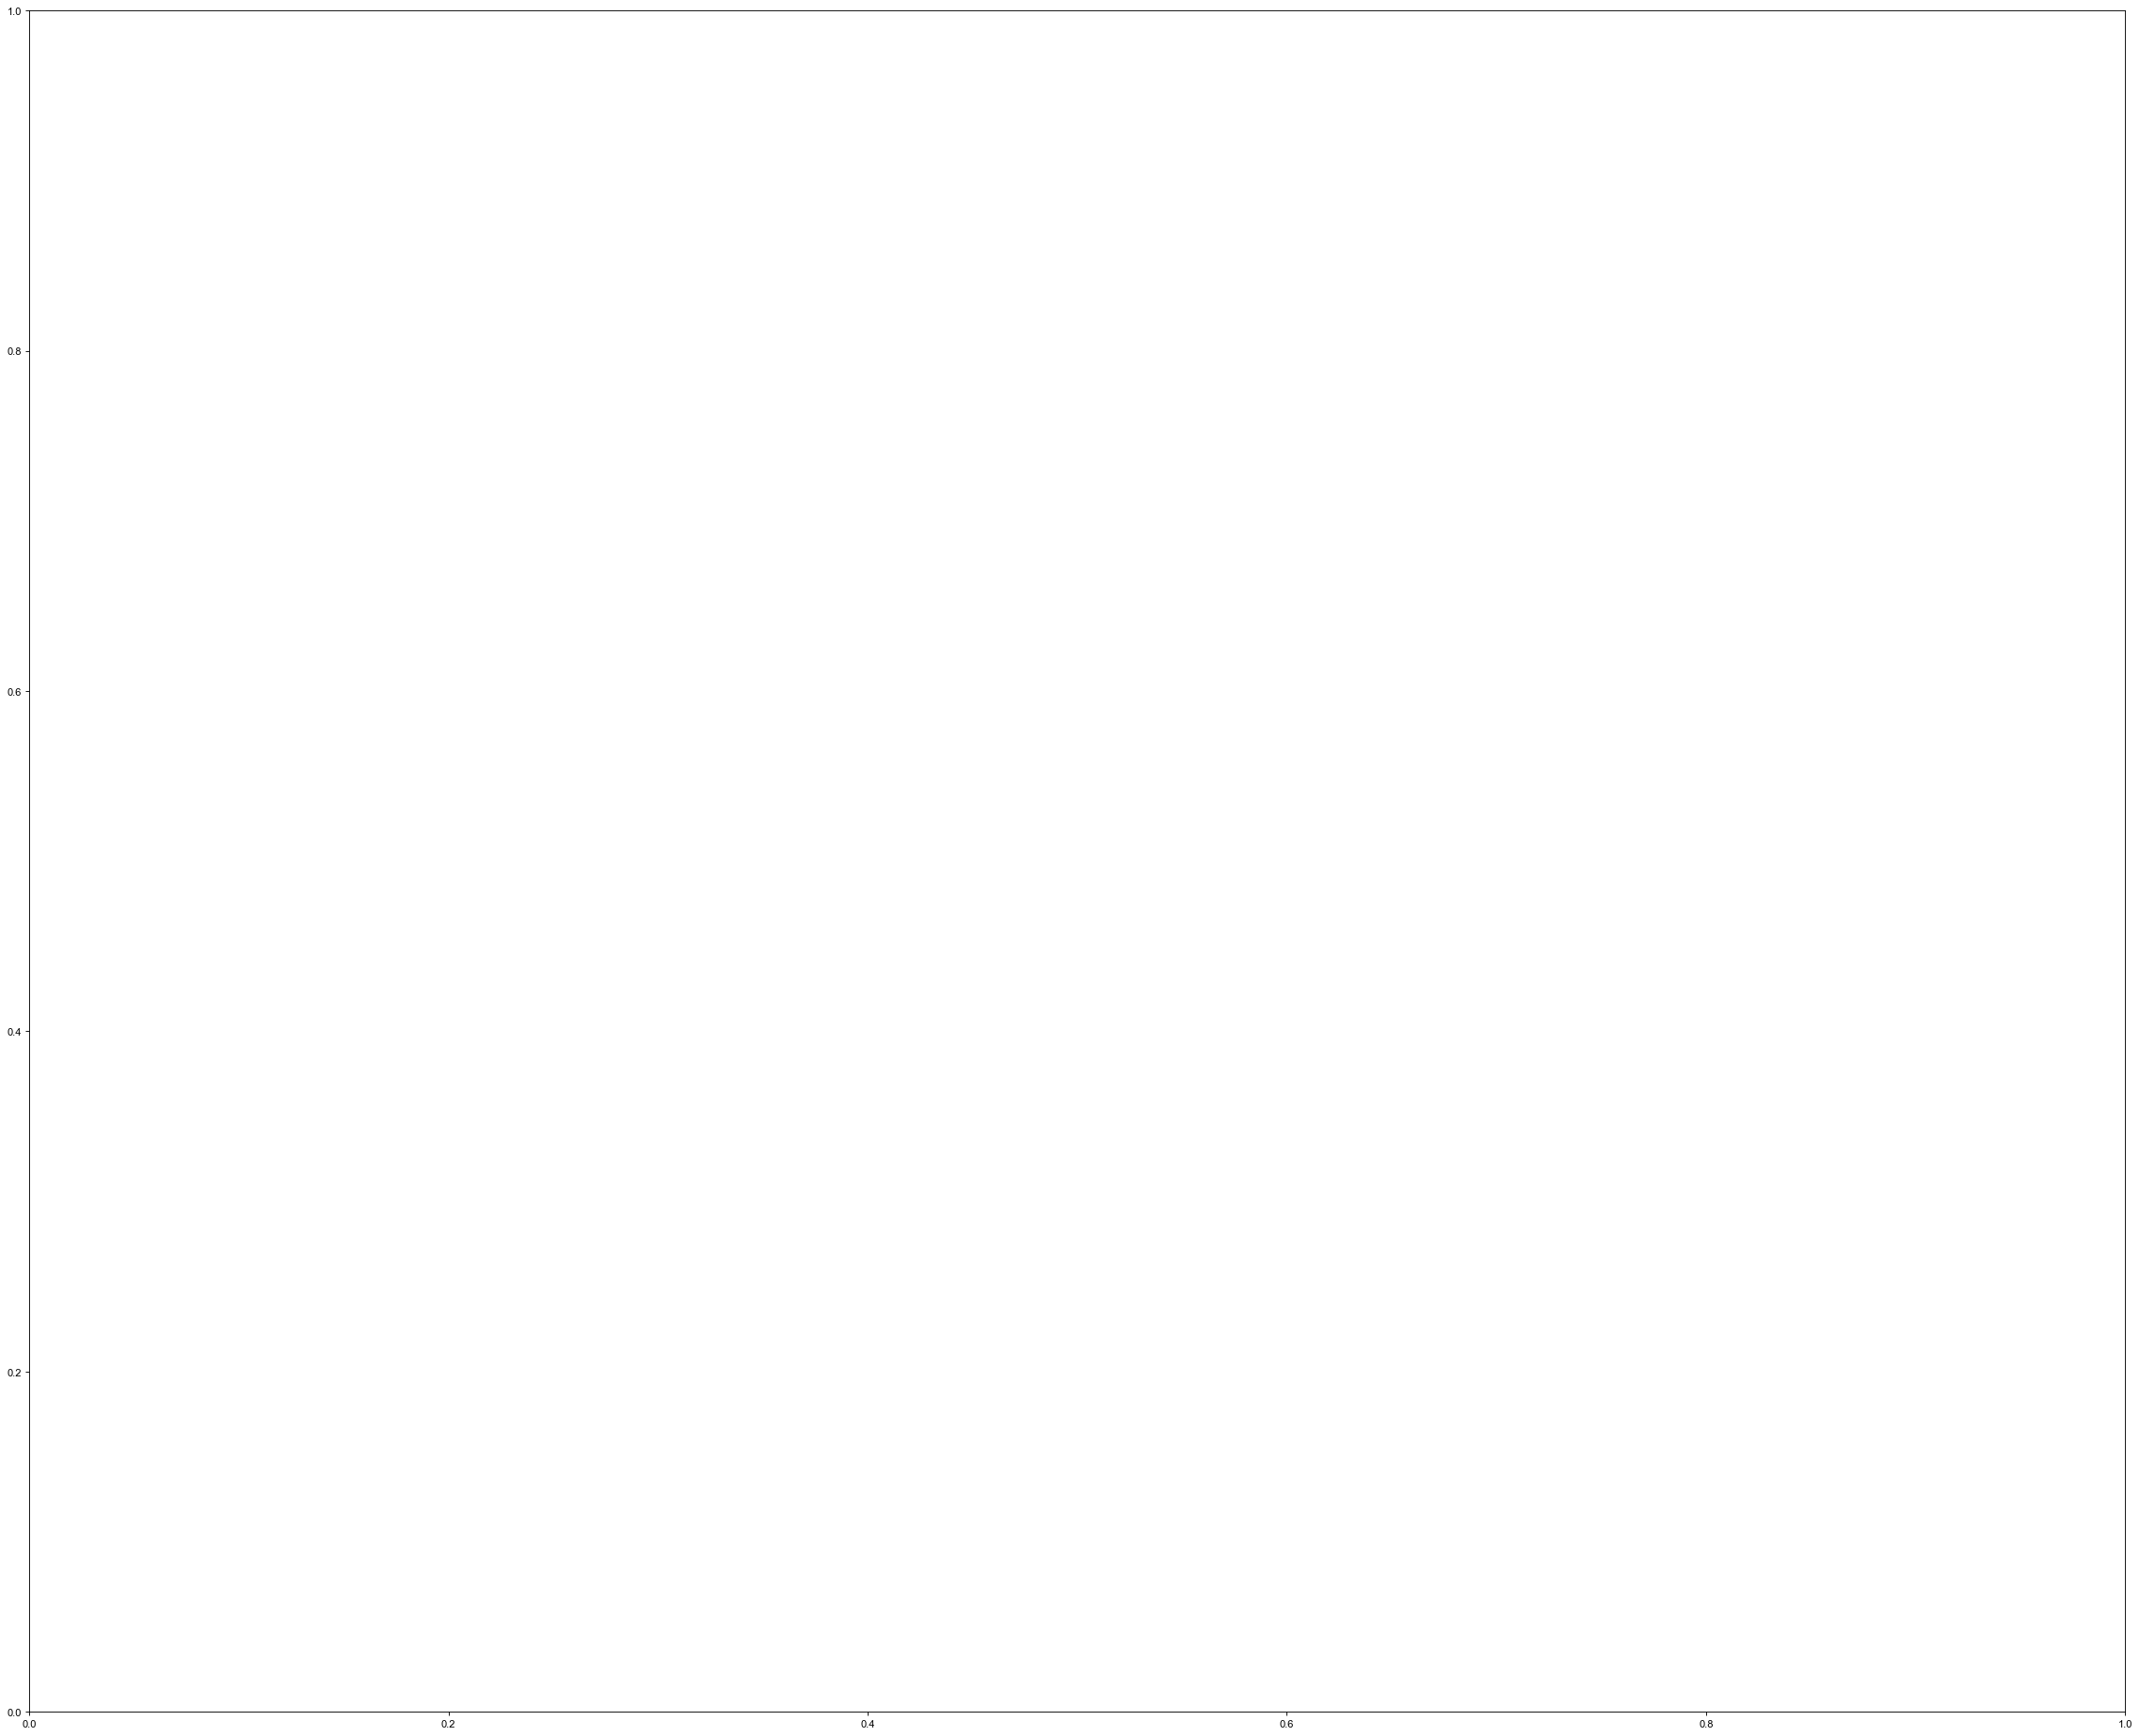

In [8]:
# Importing dependencies for heatmap correlation visualization 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Using the figure, axes together using `plt.subplots()` function:
fig, ax = plt.subplots(figsize=(36, 30), dpi=80, facecolor='w', edgecolor='k')

# Calculating the correlation matrix for each features in dataset 
corr = selected_features.dropna().corr()

# Setting features
top_corr_features = corr.index
sns.set(font_scale=3.5)
sns.set_theme(context = "paper", style="ticks", font_scale=1.8)

# include diagonal elements also
mask=np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False

# Adjusting the x & y ticks and adding title
ax.set(title="Maternal Maternity Ratio Heatmap Correlation")
plt.title("Maternal Maternity Ratio Heatmap Correlation", fontsize = 30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)


# Plotting the heatmap
sns.heatmap(corr[top_corr_features], mask=mask, 
            cmap=sns.diverging_palette(220, 10, sep=50, as_cmap=True),
            square=True, annot=True, ax=ax, fmt='.2f', linewidths=2, linecolor='white', 
            cbar_kws={"shrink": .95, "extend":'both'})

# Saving the heatmap
plt.savefig("../../static/img/LR_Non_Race_heatmap1.png")

#### Based on the above heatmap and the correlation matrix a more focused correlation matrix and heatmap is generated with stronger associations to maternal mortality ratio

In [10]:
# Selecting the features from the dataframe have stronger associations with maternal mortality ratio
heatmap2 = mmr_without_race[['maternal_mortality_ratio', 'medicare', 
        'cancer_death_val', 'cardio_death_val',
       'child_pov_val', 'dent_vis_val', 'dentists_val',
       'diabetes_val', 'health_stat_fem_val',
       'income_ineq_val', 'infant_mort_val',
       'obesity_val', 'phys_inac_val', 'prem_death_val',
       'smoking_val', 'all_determs_val', 'all_outcomes_val',
       'chlamydia_val', 'prem_death_ri_val', 'low_birthweight_val']]
heatmap2.head()

,maternal_mortality_ratio,medicare,cancer_death_val,cardio_death_val,child_pov_val,dent_vis_val,dentists_val,diabetes_val,health_stat_fem_val,income_ineq_val,infant_mort_val,obesity_val,phys_inac_val,prem_death_val,smoking_val,all_determs_val,all_outcomes_val,chlamydia_val,prem_death_ri_val,low_birthweight_val
0,20.11,4.0,211.6,330.1,25.2,60.0,44.0,12.9,43.5,5.27,8.8,33.5,27.6,10095.0,21.1,-0.371,-0.325,611.0,1.2,10.0
1,59.17,3.8,211.1,332.9,22.3,60.0,43.8,13.5,43.8,5.24,8.6,35.6,31.9,10097.0,21.4,-0.427,-0.366,600.2,1.1,10.1
2,69.56,4.2,210.6,339.6,24.3,62.3,43.7,14.6,43.8,5.31,8.5,35.7,29.4,10321.0,21.5,-0.427,-0.335,543.6,1.2,10.4
3,53.67,3.6,210.5,342.6,24.5,62.3,40.4,14.1,43.5,5.25,8.7,36.3,32.0,10720.0,20.9,-0.483,-0.356,553.6,1.1,10.3
4,59.71,3.8,210.8,347.0,23.8,60.8,41.8,14.5,41.1,5.31,8.2,36.2,30.7,10435.0,19.2,-0.437,-0.383,614.1,1.2,10.3


AttributeError: module 'seaborn' has no attribute 'set_theme'

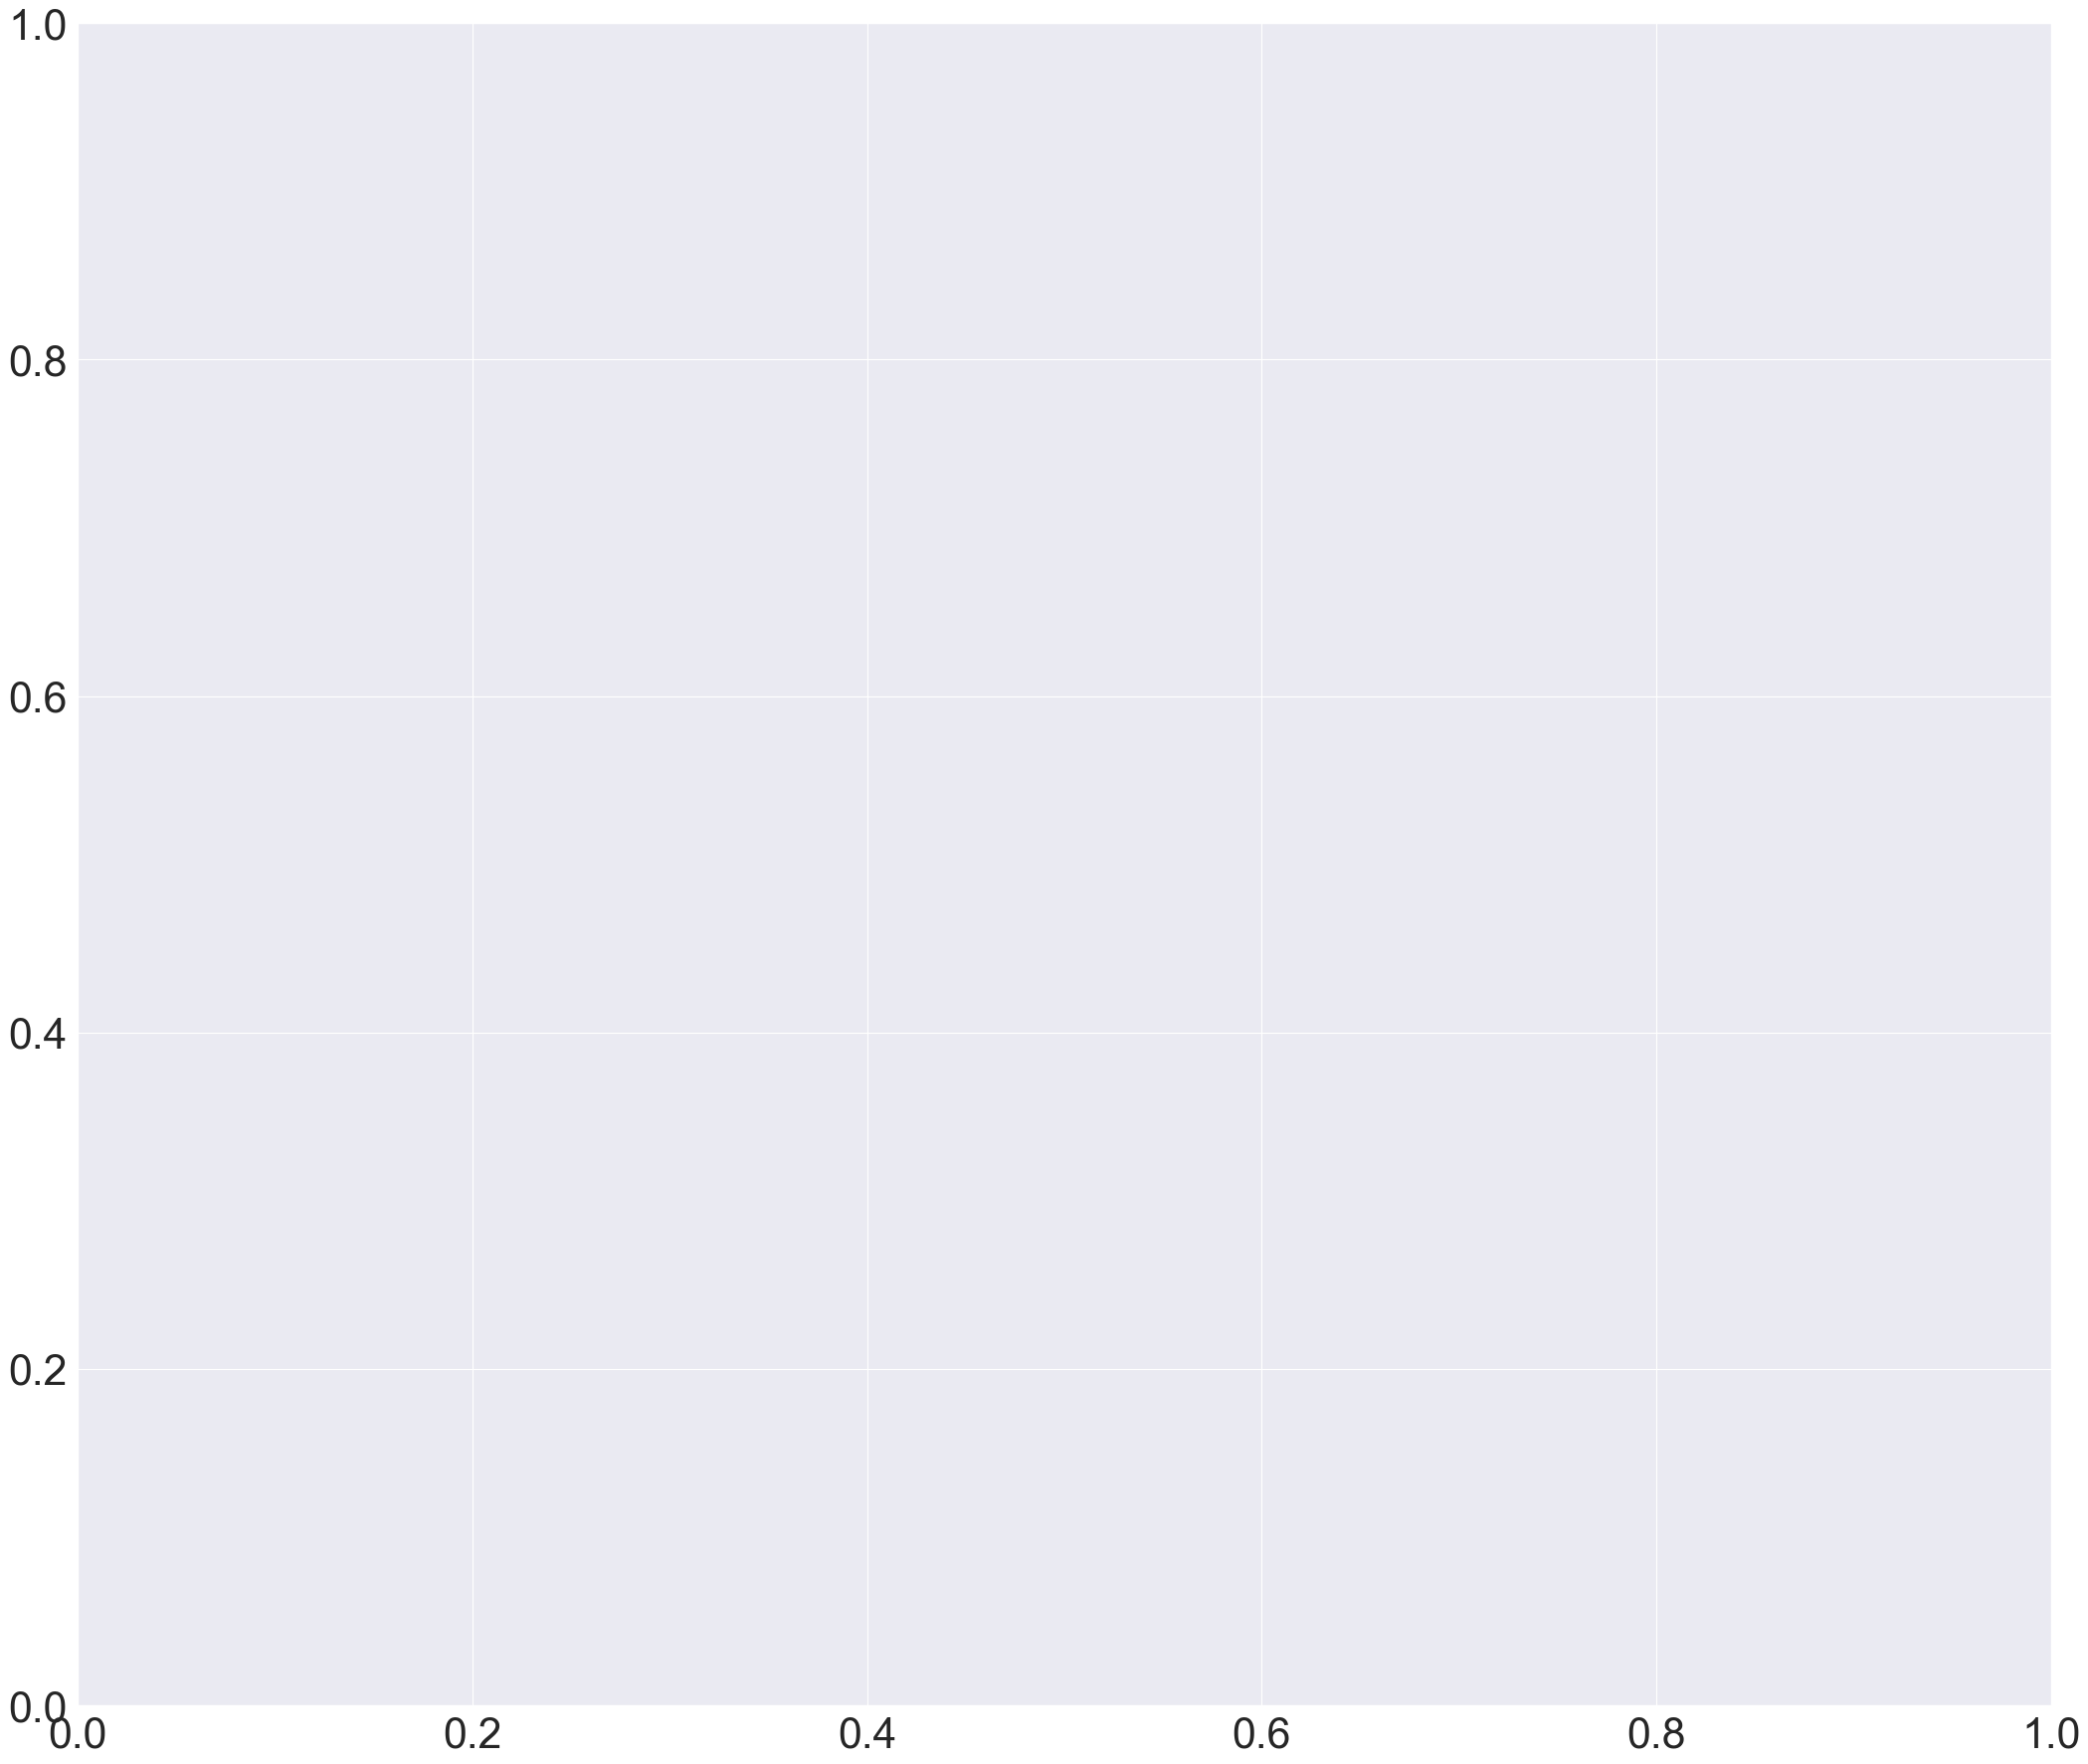

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Using the figure, axes together using `plt.subplots()` function:
fig, ax = plt.subplots(figsize=(32, 28), dpi=80, facecolor='w', edgecolor='k')

# Calculating the correlation matrix for each features in dataset 
corr = heatmap2.dropna().corr()

# Setting features
top_corr_features = corr.index
sns.set(font_scale=2.5)
sns.set_theme(context = "notebook", style="ticks", font_scale=1.8)

# include diagonal elements also
mask=np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False

# Adjusting the x & y ticks and adding title
ax.set(title="Maternal Maternity Ratio Heatmap Correlation")
plt.title("Maternal Maternity Ratio Heatmap Correlation", fontsize = 25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# Plotting the heatmap
sns.heatmap(corr[top_corr_features], mask=mask, 
            cmap=sns.diverging_palette(220, 10, sep=50, as_cmap=True),
            square=True, annot=True, ax=ax, fmt='.2f', linewidths=2, linecolor='white', 
            cbar_kws={"shrink": .95, "extend":'both'})

# Saving the heatmap
plt.savefig("../../static/img/LR_Non_Race_heatmap2.png")

### Creating a Train Test Split
***
We are using `maternal_mortality_ratio` for the y values

In [12]:
# Selecting and assigning the X & y values
y = mmr_without_race['maternal_mortality_ratio'].values.reshape(-1,1)
X = selected_features.drop(columns=['maternal_mortality_ratio', 'deaths', 'births'], axis=1)

In [13]:
# Print the selecting X & y shapes
print('Shape:', X.shape, y.shape)

Shape: (308, 33) (308, 1)


In [14]:
X

,population,employer,non_group,medicaid,medicare,military,uninsured,air_pollution_val,cancer_death_val,cardio_death_val,...,prem_death_val,smoking_val,uninsured_val,all_determs_val,all_outcomes_val,chlamydia_val,prem_death_ri_val,teen_birth_val,primary_care_val,low_birthweight_val
0,2505795.0,57.4,8.9,13.6,4.0,2.2,13.9,9.5,211.6,330.1,...,10095.0,21.1,12.9,-0.371,-0.325,611.0,1.2,34.3,103.5,10.0
1,2507714.0,58.7,9.1,13.8,3.8,1.9,12.7,9.1,211.1,332.9,...,10097.0,21.4,11.1,-0.427,-0.366,600.2,1.1,32.0,116.4,10.1
2,2514911.0,58.0,8.6,13.6,4.2,2.3,13.3,8.9,210.6,339.6,...,10321.0,21.5,9.6,-0.427,-0.335,543.6,1.2,30.1,119.3,10.4
3,2523756.0,58.8,7.5,13.7,3.6,2.5,13.9,8.4,210.5,342.6,...,10720.0,20.9,9.3,-0.483,-0.356,553.6,1.1,28.4,122.8,10.3
4,2533668.0,58.8,7.8,13.9,3.8,2.4,13.3,8.1,210.8,347.0,...,10435.0,19.2,9.7,-0.437,-0.383,614.1,1.2,27.0,122.8,10.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,2898057.0,65.8,8.2,15.0,1.7,0.8,8.6,9.3,193.2,236.8,...,6207.0,18.7,9.0,0.165,0.067,415.4,2.0,21.9,125.0,7.1
304,2903737.0,67.5,8.9,15.0,1.6,0.7,6.4,9.1,193.3,237.2,...,6365.0,17.4,8.2,0.146,0.046,411.6,1.9,19.6,125.3,7.0
305,2905282.0,66.9,9.1,15.2,1.7,0.9,6.2,7.9,191.6,236.8,...,6324.0,17.3,6.5,0.114,0.106,403.2,1.9,18.0,140.3,7.3
306,2912745.0,67.8,8.9,15.1,1.5,0.7,6.0,7.4,191.7,238.1,...,6437.0,17.1,5.5,0.201,0.072,423.5,1.9,16.2,145.2,7.3


#### Create a Train Test Split

In [23]:
# Spliting our data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [24]:
# Checking X_train length
len(X_train)

215

In [25]:
# Checking y_train length
len(y_train)

215

In [26]:
type(y_train)

numpy.ndarray

In [27]:
type(X_train)

pandas.core.frame.DataFrame

### Linear Regression Baseline Model

In [28]:
# from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [29]:
# Step 1: Creating a linear regression model
model = LinearRegression()
model

LinearRegression()

In [30]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [31]:
# Step 2: Fitting (train) our model to the data
model.fit(X_train, y_train)

LinearRegression()

In [32]:
# Obtaining the coefficient of determination (R2)
r_sq = model.score(X_train, y_train)
print('Coefficient of determination:', r_sq)

Coefficient of determination: 0.5372717318940253


In [33]:
# Printing the intercept
print('intercept:', model.intercept_)

intercept: [802.43445073]


In [34]:
# Printing the slope
print('slope:', model.coef_)

slope: [[-1.52305284e-06 -7.45898318e+00 -8.20725091e+00 -7.44168147e+00
  -8.90473835e+00 -9.05118233e+00 -7.37963797e+00  1.23546274e+00
  -2.32081917e-02  2.26801462e-02 -1.85694046e-02 -2.12281418e-01
  -1.53700191e-02 -4.11082311e-01  2.79487488e-01 -3.63625279e-01
   2.80072386e-02 -6.63856512e-02  1.11262461e+01 -3.63926869e+00
   1.40182946e-02  6.20057311e-01  7.49938094e-02  3.66955285e-03
  -9.51695165e-01  6.08018923e-01 -1.38656342e+01  1.74893131e+01
  -2.92165873e-02 -1.29918735e+01 -7.14078106e-01 -3.89833886e-02
   2.28178610e+00]]


In [35]:
# Step 3: Predicting
y_pred = model.predict(X_test)
print('Predicted response:', y_pred, sep='\n')

Predicted response:
[[15.24745336]
 [25.41191391]
 [36.59494593]
 [51.24486682]
 [42.82578603]
 [46.38372944]
 [40.6127712 ]
 [32.02089861]
 [46.00017402]
 [22.05798492]
 [28.05709564]
 [35.97516243]
 [17.08126379]
 [24.40549852]
 [29.05479021]
 [16.05749038]
 [19.44123276]
 [62.46179715]
 [35.66008891]
 [35.91572975]
 [28.15076624]
 [43.00956657]
 [28.74468579]
 [29.24716838]
 [29.06942489]
 [33.02589408]
 [52.38272795]
 [11.54638039]
 [30.88210628]
 [49.02992253]
 [53.1888202 ]
 [55.94497516]
 [38.33714819]
 [37.63294122]
 [25.57295605]
 [42.78657465]
 [25.81265897]
 [38.86858365]
 [33.47650242]
 [29.59789036]
 [25.10490176]
 [39.57949751]
 [38.09621088]
 [34.14788943]
 [16.33539066]
 [22.73558011]
 [42.39259235]
 [23.43733323]
 [29.11536199]
 [25.85030124]
 [53.401096  ]
 [31.47729583]
 [ 8.34357297]
 [40.55943356]
 [25.63436441]
 [28.00712332]
 [19.52025394]
 [33.026305  ]
 [26.20414578]
 [31.35971454]
 [39.55370614]
 [26.23417014]
 [33.80680813]
 [50.67227643]
 [44.59121634]
 [29.

In [36]:
# Predicting the min & max values
X_min = np.array([X.min()])
X_max = np.array([X.max()])
print(f"Min X Value: {X_min}")
print(f"Max X Value: {X_max}")

Min X Value: [[ 7.82258e+05  4.68000e+01  4.50000e+00  6.60000e+00  8.00000e-01
   3.00000e-01  2.60000e+00  5.70000e+00  1.42300e+02  1.82700e+02
   8.00000e+00  6.63000e+01  5.41000e+01  3.86000e+01  5.90000e+00
   6.00000e+00  3.93000e+01  5.71000e+01  3.70000e+00  4.10000e+00
  -1.01700e+00  2.02000e+01  1.57000e+01  5.35800e+03  8.80000e+00
   2.70000e+00 -7.67000e-01 -3.83000e-01  2.37500e+02  1.00000e+00
   8.50000e+00  7.61000e+01  6.10000e+00]]
Max X Value: [[1.9893468e+07 6.9900000e+01 1.4500000e+01 3.1000000e+01 4.2000000e+00
  5.2000000e+00 2.9900000e+01 1.5300000e+01 2.3490000e+02 3.7370000e+02
  3.3700000e+01 9.1100000e+01 8.1600000e+01 8.2700000e+01 1.5200000e+01
  4.1400000e+01 6.1700000e+01 9.5980000e+01 5.8300000e+00 1.0300000e+01
  3.9900000e+01 3.9500000e+01 3.7200000e+01 1.1485000e+04 2.8300000e+01
  2.5600000e+01 7.7800000e-01 3.4100000e-01 7.9910000e+02 3.3000000e+00
  7.1900000e+01 2.4500000e+02 1.2300000e+01]]


In [37]:
# Calculate the y_min and y_max using model.predict and x_min and x_max
y_min = model.predict(X_min)
y_max = model.predict(X_max)
print(f"Min Y Value: {y_min}")
print(f"Max Y Value: {y_max}")

Min Y Value: [[352.57806899]]
Max Y Value: [[-470.67097576]]


In [39]:
from sklearn.metrics import mean_squared_error, r2_score

# Using the model to predict a value
predicted = model.predict(X)

# Scoring the prediction with mse and r2
mse = mean_squared_error(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 87.8900029431369


In [40]:
# Calling the `score` method on the model to show the r2 score
model.score(X_test, y_test)

0.3583576674946365

In [41]:
# Fitting the model to the training data and calculating the scores for the training and testing data
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.5372717318940253
Testing Score: 0.3583576674946365


Text(0.5, 1.0, 'Maternal Mortality')

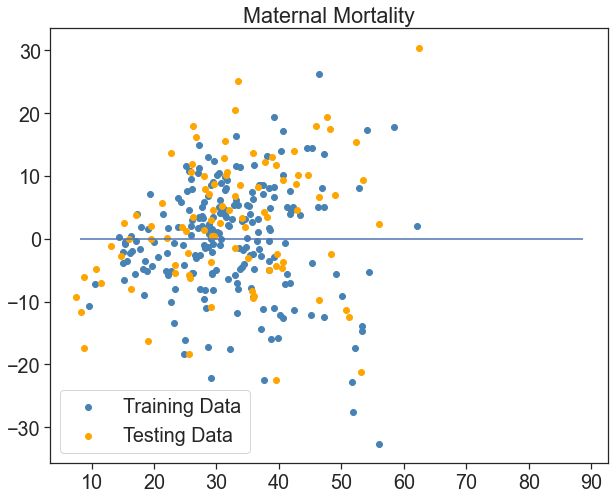

In [42]:
# Plotting training and testing data
plt.figure(figsize=(10,8))
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="steelblue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Maternal Mortality")

## Note:
***
This notebook contains the baseline model for Linear Regression of Maternal Mortality without race, refer to [notebook 2](https://github.com/abpuccini/maternal-mortality-project/blob/main/machine_learning/model_testing/LR_Non_Race_Model2_Chahnaz.ipynb) for further analysis and time-series forcast predictions. 

### Saving the Model

In [43]:
# Saving the model with `joblib`
import joblib 

filename = '../models/LR_model1_Chahnaz.sav'
joblib.dump(model, filename)

['../models/LR_model1_Chahnaz.sav']